# 1) EDA (Kaggle) — Telco Customer Churn

Bu notebook'ta **Pandas + Matplotlib/Seaborn** ile EDA (Exploratory Data Analysis) yapacağız.

Amaç:
- Veriyi tanımak (head/info/describe)
- Eksik veri kontrolu
- Temel temizlik (dtype düzeltme)
- Grafiklerle yorum yapmak


## 2) Kurulum


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 60)
pd.set_option("display.width", 140)
sns.set_theme()

print("Hazır!")


Hazır!


## 3) Veri yükleme


In [4]:

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4) İlk bakış (core kontrol)


In [5]:
print("Shape:", df.shape)
df.info()


Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [6]:
df.describe(include="all").T.head(15)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5) Eksik veri kontrolu


In [7]:
df.isna().sum().sort_values(ascending=False).head(10)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## 6) Hafif temizlik


Bu veri setinde genelde şu 2 düzeltme gerekir:
- `TotalCharges` sayısal gibi görünür ama string gelebilir.
- `Churn` hedef değişkeni (Yes/No) -> analiz için 0/1 yapmak iyi olur.


In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df["Churn_flag"] = (df["Churn"] == "Yes").astype(int)
df["SeniorCitizenLabel"] = np.where(df["SeniorCitizen"] == 1, "Senior", "NotSenior")

df[["TotalCharges","Churn","Churn_flag","SeniorCitizen","SeniorCitizenLabel"]].head()


,TotalCharges,Churn,Churn_flag,SeniorCitizen,SeniorCitizenLabel
0,29.85,No,0,0,NotSenior
1,1889.50,No,0,0,NotSenior
2,108.15,Yes,1,0,NotSenior
3,1840.75,No,0,0,NotSenior
4,151.65,Yes,1,0,NotSenior


### 6.1) TotalCharges için NaN kontrolü


In [9]:
df["TotalCharges"].isna().sum()


np.int64(11)

In [10]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)


## 7) EDA — Grafiklerle yorum


### 7.1) Churn dağılımı


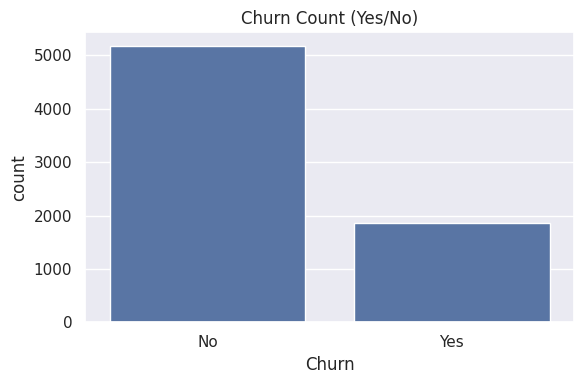

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn")
plt.title("Churn Count (Yes/No)")
plt.tight_layout()
plt.show()


### 7.2) Churn oranı: Contract tipine göre


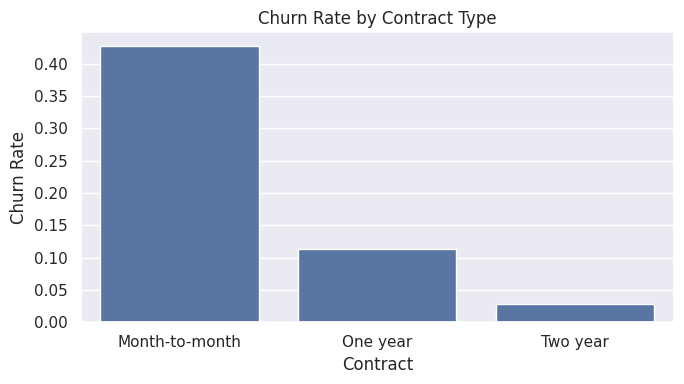

,Contract,Churn_flag
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


In [12]:
churn_by_contract = df.groupby("Contract")["Churn_flag"].mean().reset_index().sort_values("Churn_flag", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(data=churn_by_contract, x="Contract", y="Churn_flag")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.show()

churn_by_contract


### 7.3) Tenure dağılımı: churn'a göre


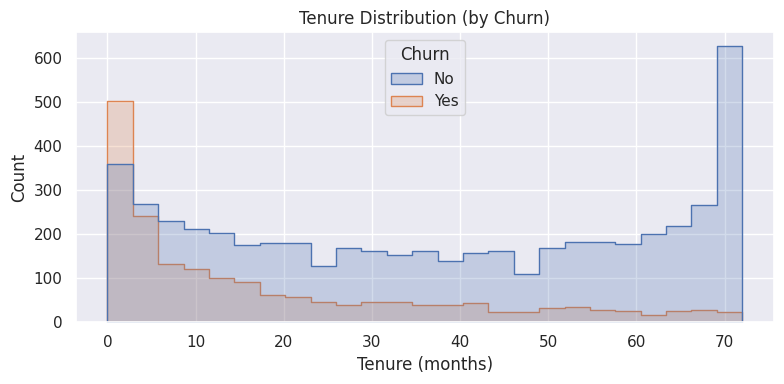

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="tenure", hue="Churn", bins=25, element="step")
plt.title("Tenure Distribution (by Churn)")
plt.xlabel("Tenure (months)")
plt.tight_layout()
plt.show()


### 7.4) MonthlyCharges: churn'a göre


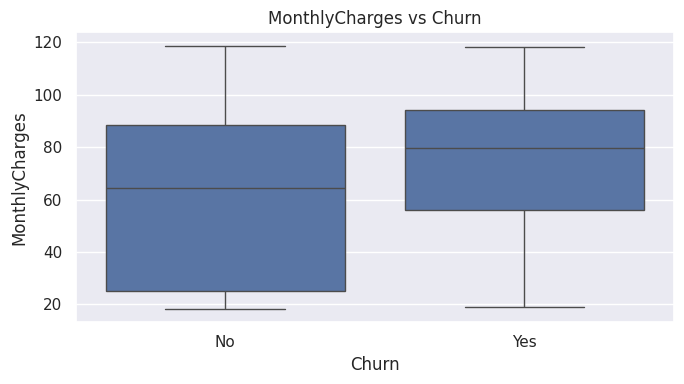

In [14]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("MonthlyCharges vs Churn")
plt.tight_layout()
plt.show()


### 7.5) PaymentMethod: churn oranı


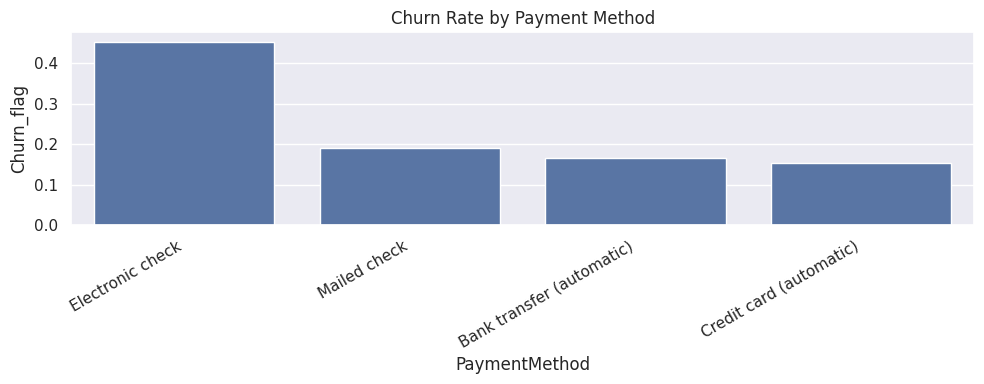

,PaymentMethod,Churn_flag
2,Electronic check,0.452854
3,Mailed check,0.191067
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431


In [15]:
churn_by_payment = df.groupby("PaymentMethod")["Churn_flag"].mean().reset_index().sort_values("Churn_flag", ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(data=churn_by_payment, x="PaymentMethod", y="Churn_flag")
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

churn_by_payment.head()


### 7.6) InternetService ile churn (crosstab)


In [16]:
pd.crosstab(df["InternetService"], df["Churn"], normalize="index")


Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


### 7.7) Korelasyon


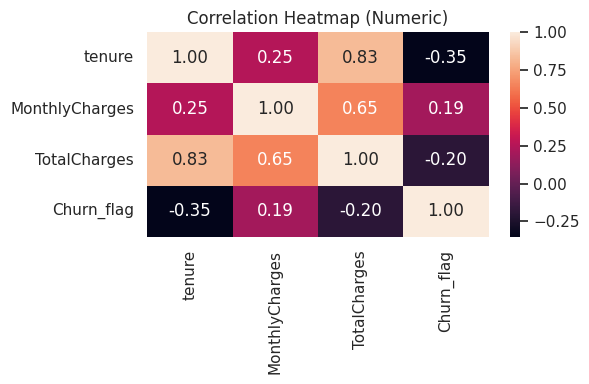

In [17]:
num_df = df[["tenure","MonthlyCharges","TotalCharges","Churn_flag"]].copy()
corr = num_df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric)")
plt.tight_layout()
plt.show()
